### 한식 이미지 분류 모형

In [9]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  
print(gpus)  

if gpus:  
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import glob
from PIL import Image
import glob

all_images=[]
all_labels=[]

img_size=(96,96)

for f in glob.glob('c:\\workspace3\\data\\images\\Foods\\**\\*.jpg', recursive=True):
    arr=f.split('\\')
    img = Image.open(f)
    img_resize = img.resize((img_size[0], img_size[1]))
    all_images.append(img_resize)
    label=0
    if arr[3]=='Chicken':
        label=0
    elif arr[3]=='Dolsot':
        label=1
    elif arr[3]=='Jeyug':
        label=2
    elif arr[3]=='Kimchi':
        label=3
    elif arr[3]=='Samgyeob':
        label=4
    elif arr[3]=='Soybean':                                        
        label=5
    all_labels.append(label)

In [11]:
import numpy as np

X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:
    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape 

(239, 96, 96, 3)

In [12]:
X = np.delete(X, (0), axis=0)

In [13]:
X.shape  

(238, 96, 96, 3)

In [14]:
y=np.array(all_labels)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

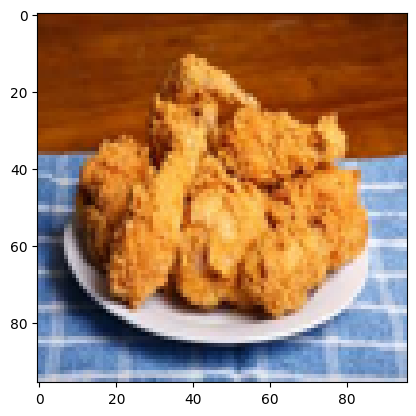

In [15]:
import matplotlib.pyplot as plt

plt.imshow(all_images[0])

plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190, 96, 96, 3), (48, 96, 96, 3), (190,), (48,))

In [17]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

0    190
Name: count, dtype: int64

In [18]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)
X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [19]:
X_train=X_train/255.
X_test=X_test/255.

In [20]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)
X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

In [21]:
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
from tensorflow.keras import utils

y_train_backup=y_train
y_test_backup=y_test

y_train=utils.to_categorical(y_train,6)
y_test=utils.to_categorical(y_test,6)

In [23]:
y_train[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

model=Sequential()

model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='tanh'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation="tanh"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,(3,3),activation="tanh"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(6,activation="softmax"))          

model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 7056)              0

In [25]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/model/food_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[checkpoint])

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.3342 - accuracy: 0.8553
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to c:/data/model\food_best.h5
5/5 [==============================] - 4s 178ms/step - loss: 0.3342 - accuracy: 0.8553 - val_loss: 3.1214e-06 - val_accuracy: 1.0000
Epoch 2/100
3/5 [=================>............] - ETA: 0s - loss: 4.9967e-06 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
5/5 [==============================] - 0s 40ms/step - loss: 3.6091e-06 - accuracy: 1.0000 - val_loss: 1.4870e-06 - val_accuracy: 1.0000
Epoch 3/100
4/5 [=======================>......] - ETA: 0s - loss: 2.1997e-06 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
5/5 [==============================] - 0s 50ms/step - loss: 2.1904e-06 - accuracy: 1.0000 - val_loss: 1.0007e-06 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 1.5936e-06 - accuracy: 1.0000
Epoch 4: val_

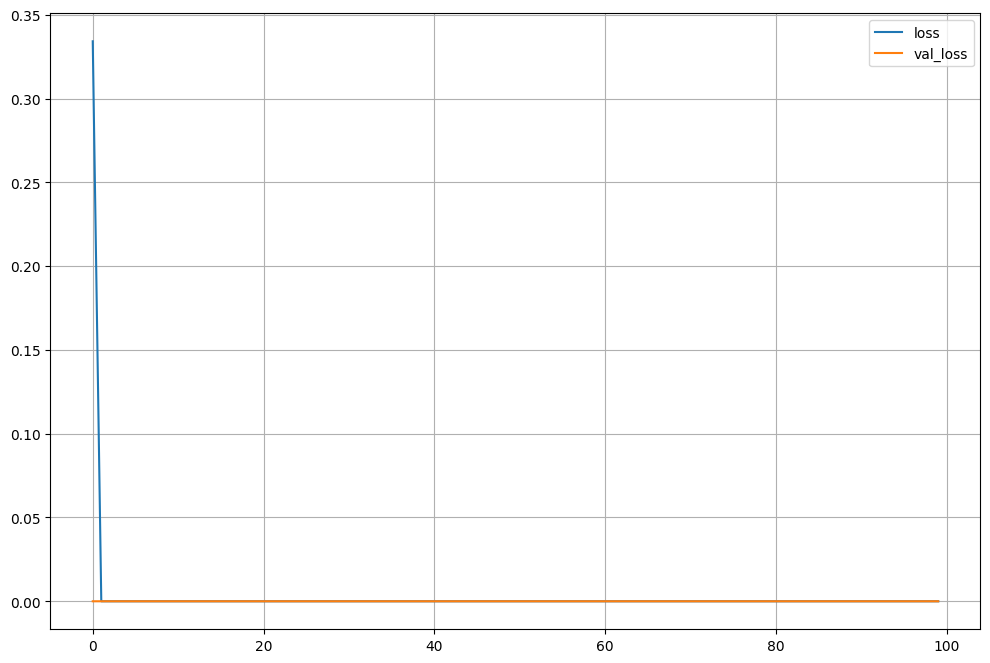

In [26]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()

plt.show()

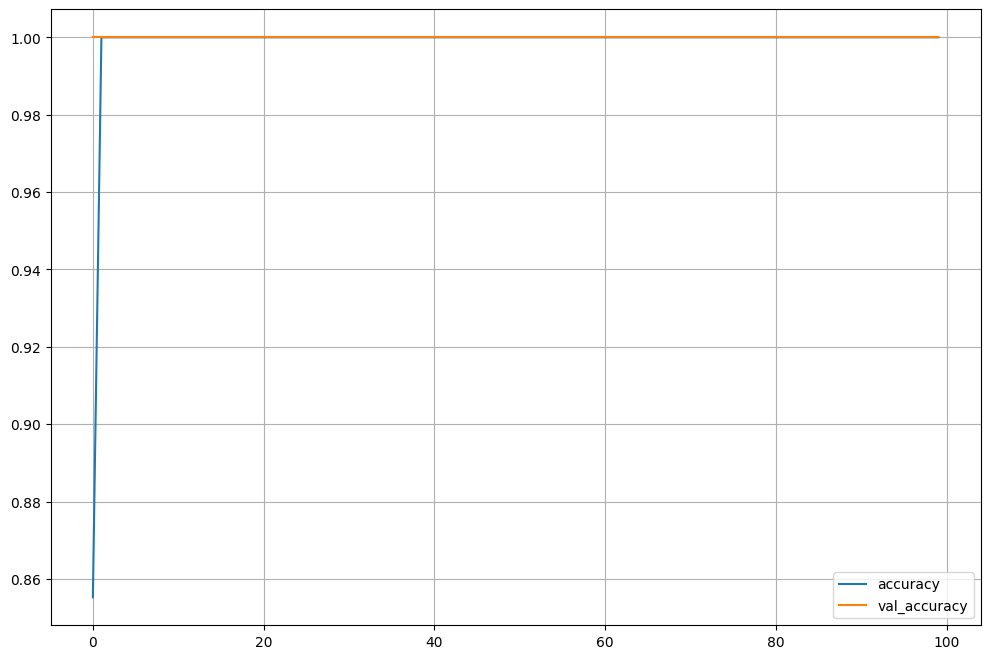

In [27]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()

plt.show()

In [28]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/food_best.h5')
scores = model.evaluate(X_train, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

6/6 [==============================] - 1s 39ms/step - loss: 4.4608e-06 - accuracy: 1.0000
[4.4608091229747515e-06, 1.0]
accuracy: 100.00%


In [29]:
scores = model.evaluate(X_test, y_test, verbose=1)

print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

2/2 [==============================] - 0s 101ms/step - loss: 2.0862e-06 - accuracy: 1.0000
[2.086151425828575e-06, 1.0]
accuracy: 100.00%


In [30]:
pred=model.predict(X_test)

np.argmax(pred,axis=1)

2/2 [==============================] - 0s 16ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test_backup, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

